In [32]:
import matplotlib as mpl
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import glob
import seaborn as sns
sns.set_theme(style="darkgrid") 

# Import the querying module
from flight_querying import query_flights
import pandas as pd

# Set up and retrieve the data from the database.
db_connect = query_flights()

# Flight IDs to include
flight_ids = [4978]

# Fetch data for specified flight IDs and select only "time" and "exercise" columns
data_frames = [db_connect.connect_flight_for_ml_data_label(flight_id)for flight_id in flight_ids]

# Concatenate data frames without shuffling
df = pd.concat(data_frames, axis=0)

# Round values in the "time" column to 2 decimal places
#df["time"] = df["time"].round(5)
df = df.dropna()
print(df.head())

     id  time    soc  cell_temperature  motor_rpm  motor_power  \
0  4978  0.00    0.0               0.0        0.0          0.0   
1  4978  0.00    0.0               0.0        0.0          0.0   
2  4978  0.02  100.0               9.5        0.0          0.0   
3  4978  0.02  100.0               9.5        0.0          0.0   
4  4978  0.04  100.0              19.0        0.0          0.0   

   motor_temperature  indicated_air_speed  pressure_altitude  ground_speed  \
0                0.0                  0.0                0.0           0.0   
1                0.0                  0.0                0.0           0.0   
2                0.0                  0.0                0.0           0.0   
3                0.0                  0.0                0.0           0.0   
4                0.0                  0.0                0.0           0.0   

   outside_air_temperature  inverter_temperature  pitch  roll exercise  
0                      0.0                   0.0    0.0   0.0

In [34]:
# Initialize shaded ranges list
shaded_ranges = []

# Iterate through the DataFrame to find exercise start and end times
start_time = 0
for i in range(len(df) - 1):
    current_exercise = df.iloc[i]["exercise"]
    next_exercise = df.iloc[i + 1]["exercise"]
    
    if current_exercise != next_exercise:
        end_time = df.iloc[i + 1]["time"]
        # Check if exercise is not 'NA' before appending to shaded_ranges
        if current_exercise != 'NA':
            # Round each element in the tuple to 3 decimal places
            shaded_ranges.append((
                round(start_time, 3),
                round(end_time, 3),
                current_exercise
            ))
        start_time = df.iloc[i + 2]["time"]

# Display shaded ranges
print(shaded_ranges)

# Convert the list of tuples to a DataFrame
shaded_df = pd.DataFrame(shaded_ranges, columns=['Start Time', 'End Time', 'Exercise'])

# Set the index name
shaded_df.index.name = 'No.'

# Display shaded DataFrame
shaded_df

[(3.66, 3.7, 'takeoff'), (4.06, 4.1, 'takeoff'), (14.94, 15.7, 'takeoff'), (15.7, 18.3, 'climb'), (18.3, 24.96, 'cruise'), (24.96, 24.98, 'climb'), (24.98, 27.12, 'cruise'), (27.12, 27.32, 'slow flight'), (27.32, 27.7, 'power off stall'), (27.7, 28.18, 'slow flight'), (28.18, 28.68, 'cruise'), (28.68, 28.72, 'climb'), (28.72, 29.0, 'cruise'), (29.02, 30.8, 'cruise'), (30.8, 31.98, 'climb'), (31.98, 34.24, 'cruise'), (34.24, 34.58, 'climb'), (34.58, 34.84, 'cruise'), (34.84, 35.82, 'climb'), (35.82, 39.4, 'cruise'), (39.4, 39.78, 'descent'), (39.78, 39.86, 'cruise'), (39.86, 39.9, 'descent'), (39.9, 39.92, 'cruise'), (39.92, 39.94, 'descent'), (39.94, 42.12, 'cruise'), (42.12, 42.14, 'descent'), (42.14, 42.16, 'cruise'), (42.16, 42.2, 'descent'), (42.2, 42.22, 'cruise'), (42.22, 42.32, 'descent'), (42.32, 42.4, 'cruise'), (42.4, 43.4, 'descent'), (43.4, 45.06, 'landing'), (45.16, 45.42, 'landing')]


,Start Time,End Time,Exercise
No.,,,
0,3.66,3.70,takeoff
1,4.06,4.10,takeoff
2,14.94,15.70,takeoff
3,15.70,18.30,climb
4,18.30,24.96,cruise
5,24.96,24.98,climb
6,24.98,27.12,cruise
7,27.12,27.32,slow flight
8,27.32,27.70,power off stall


# 4620

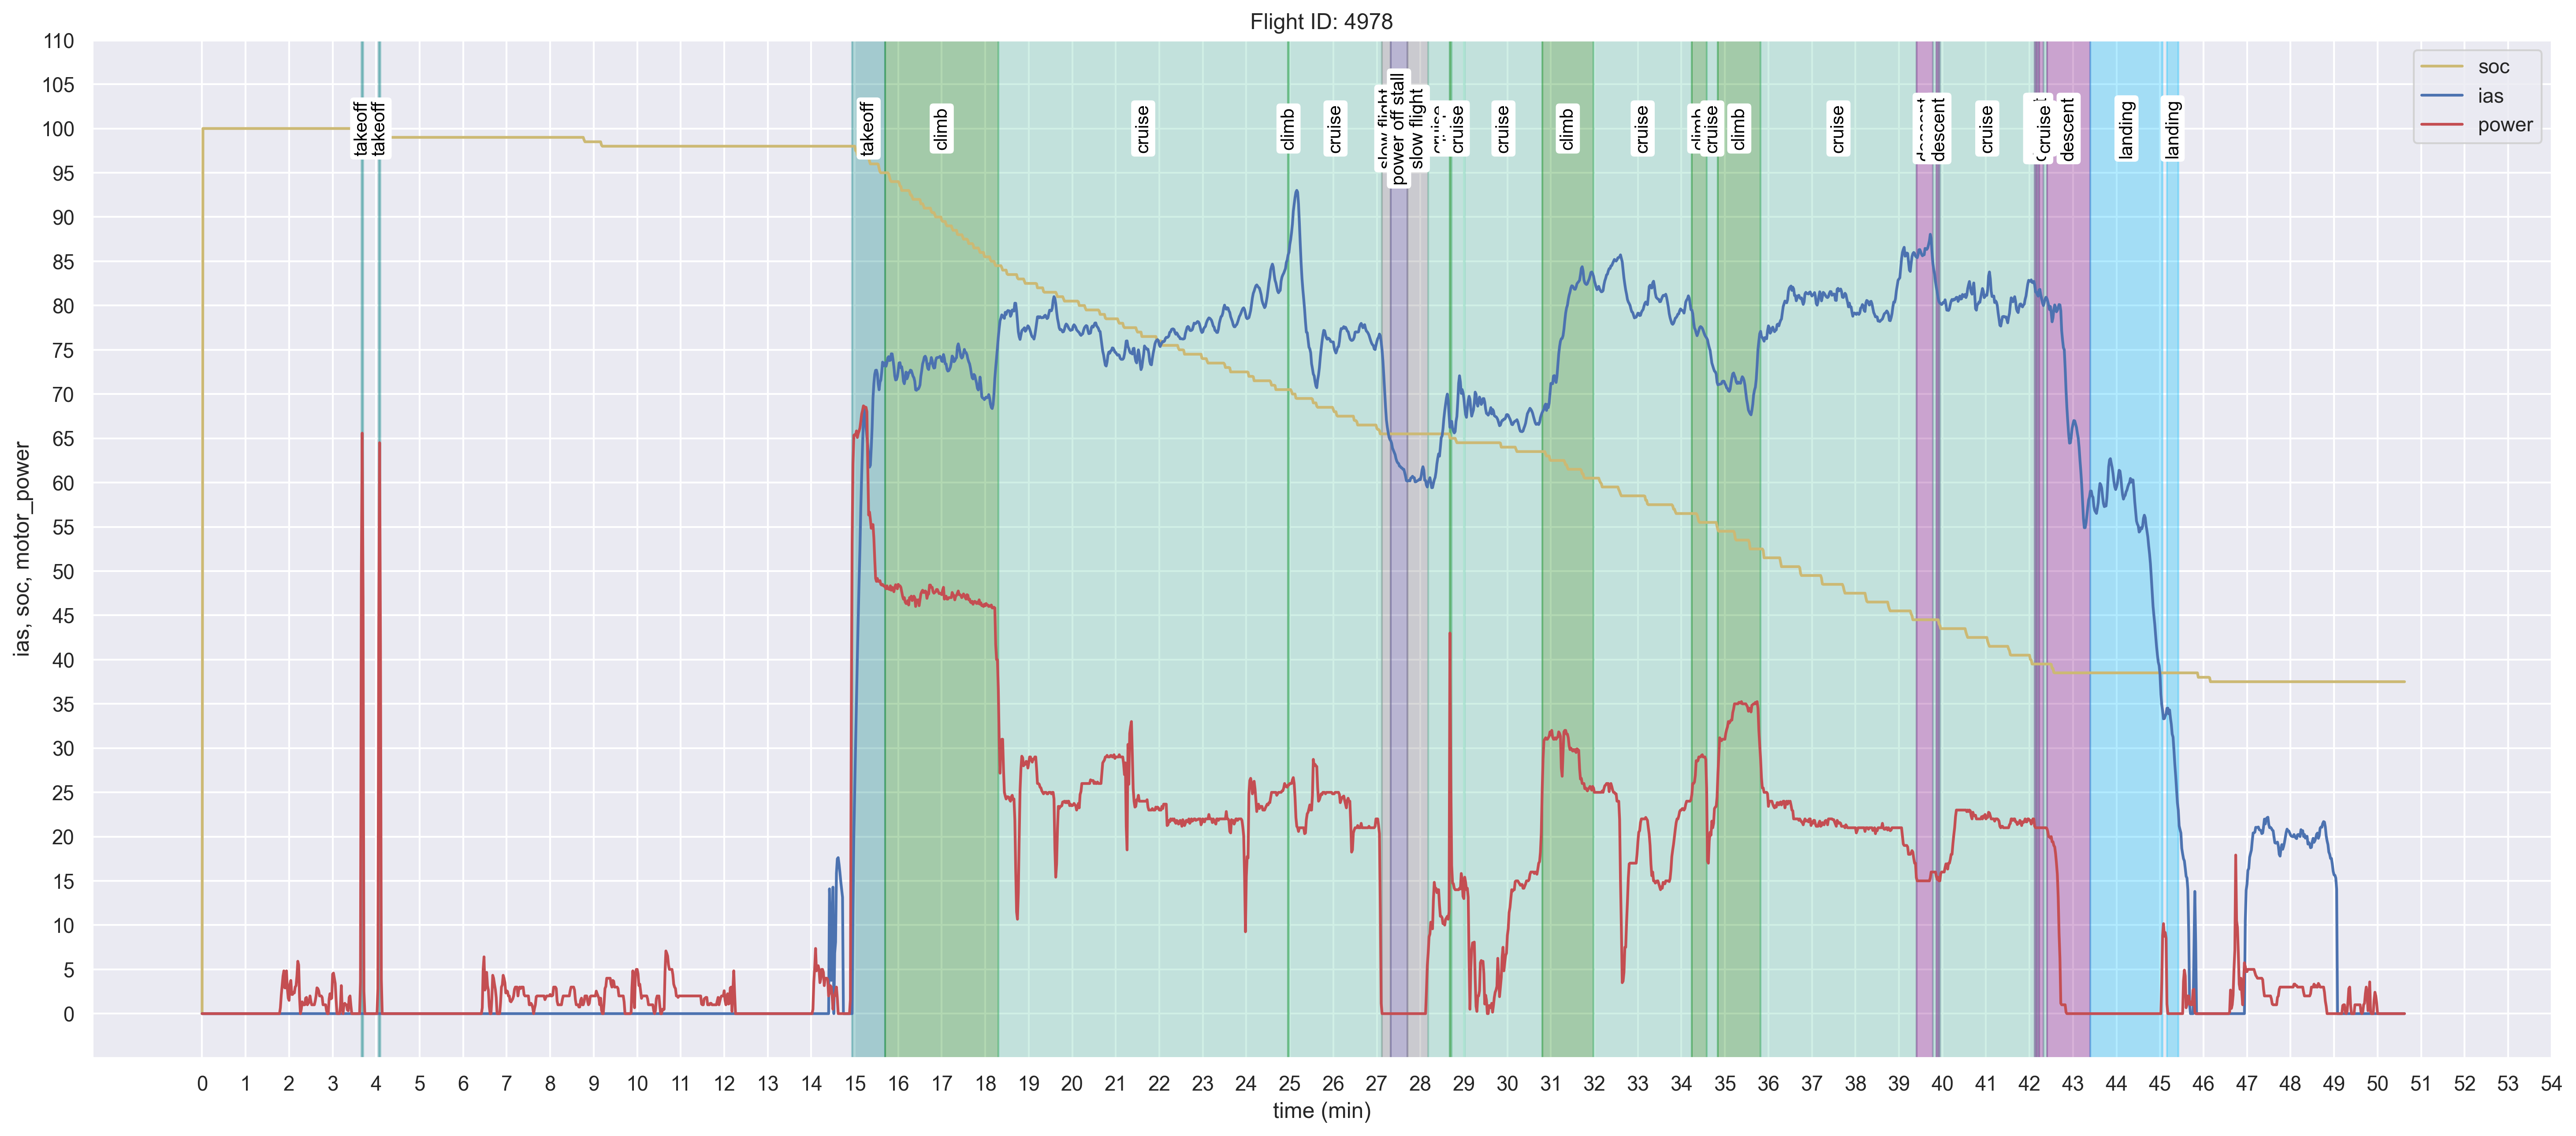

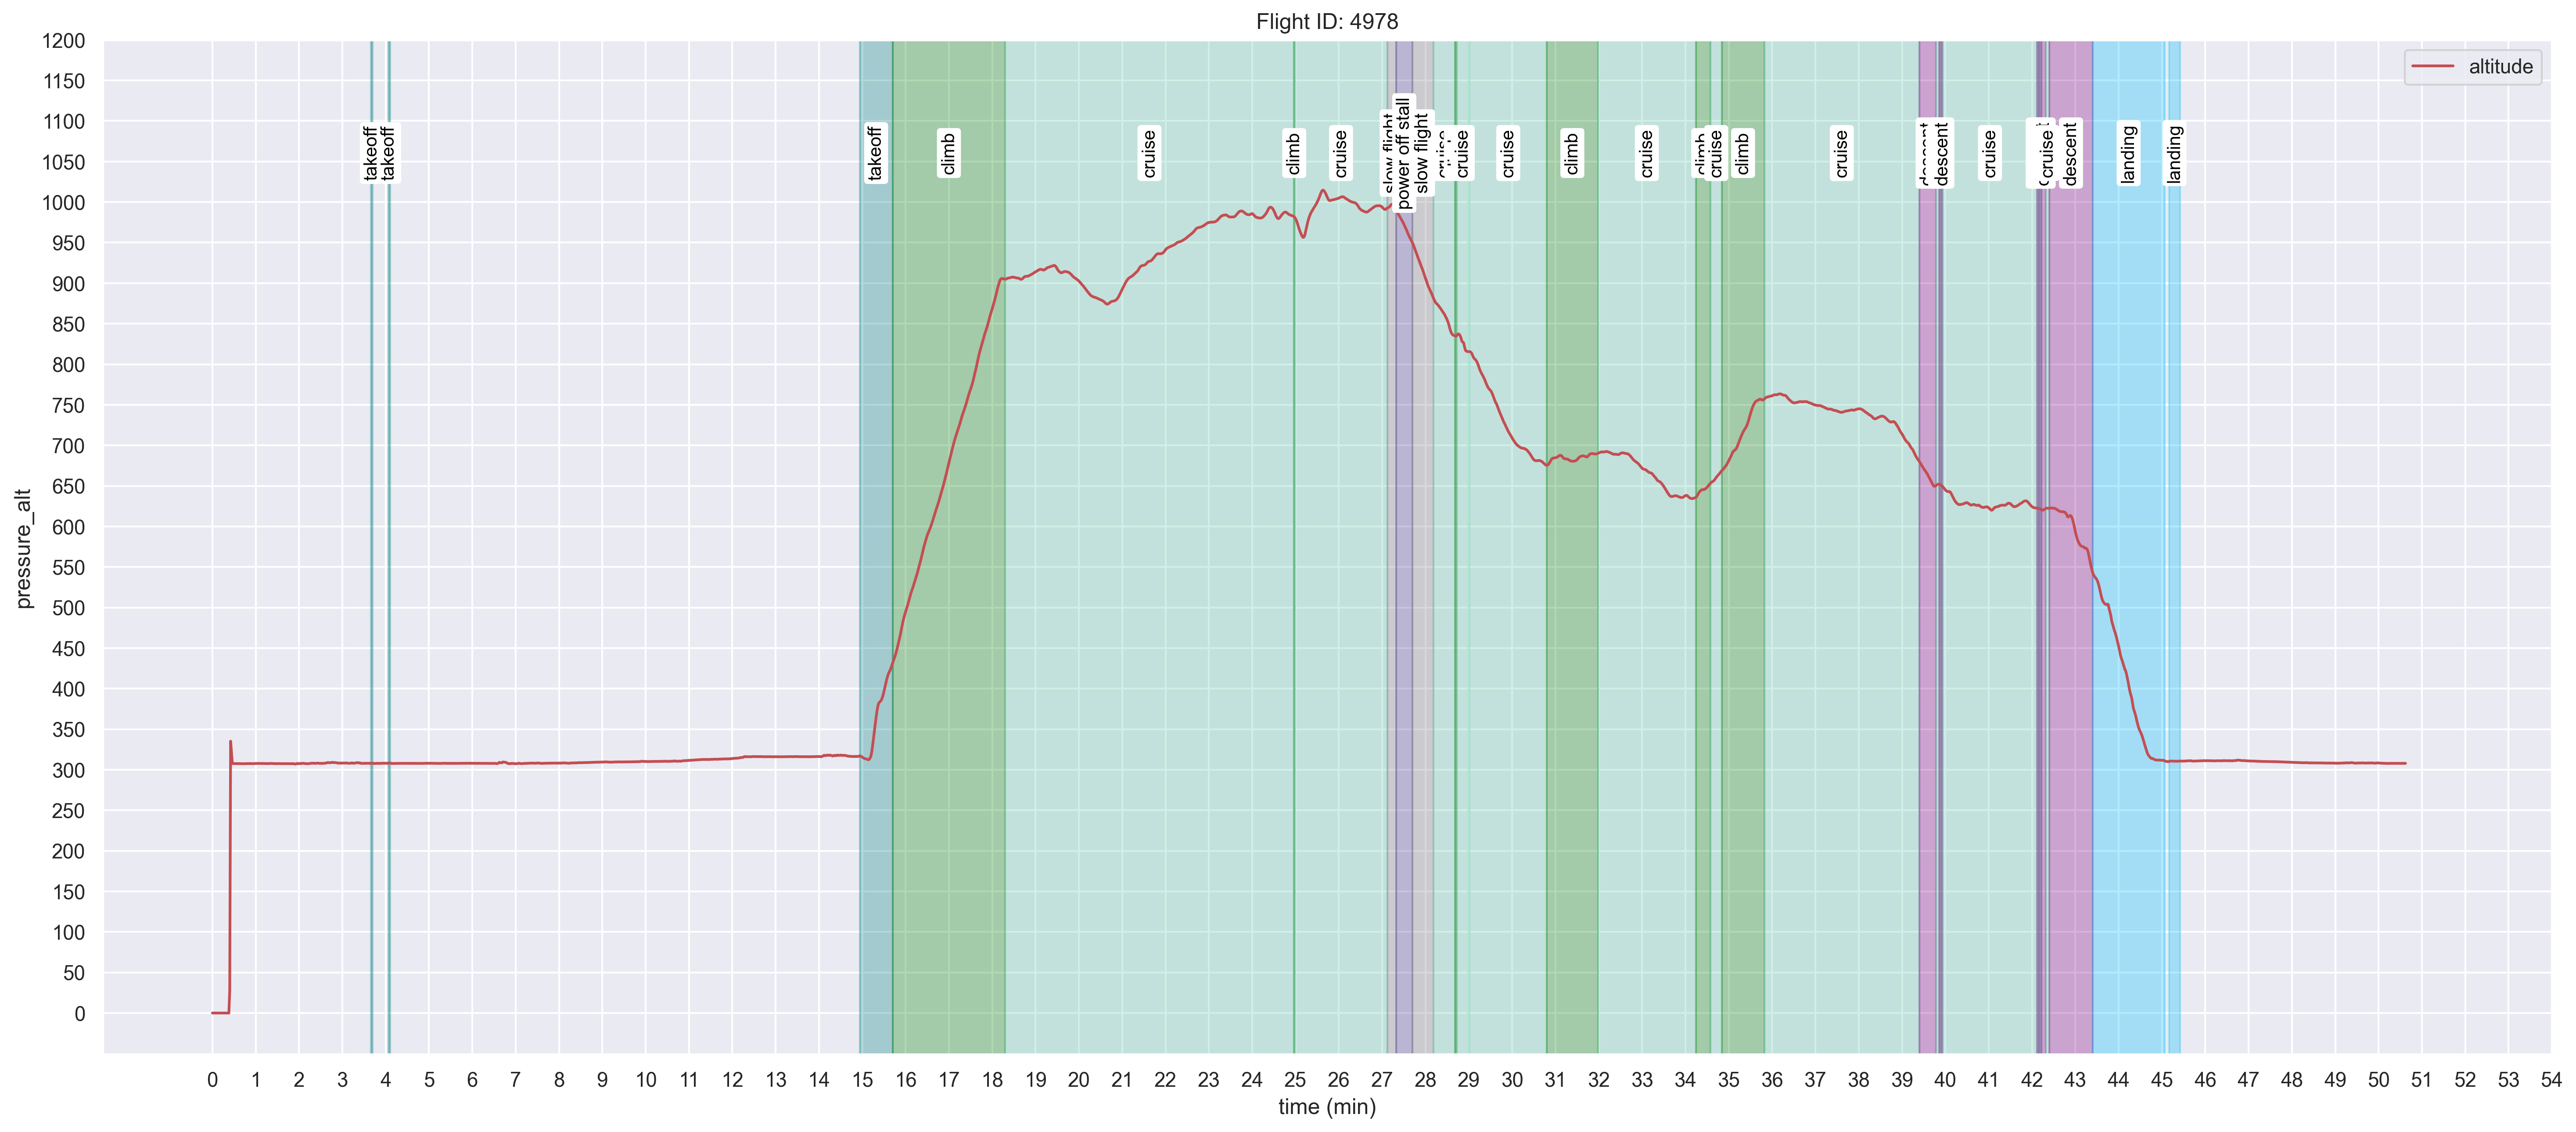

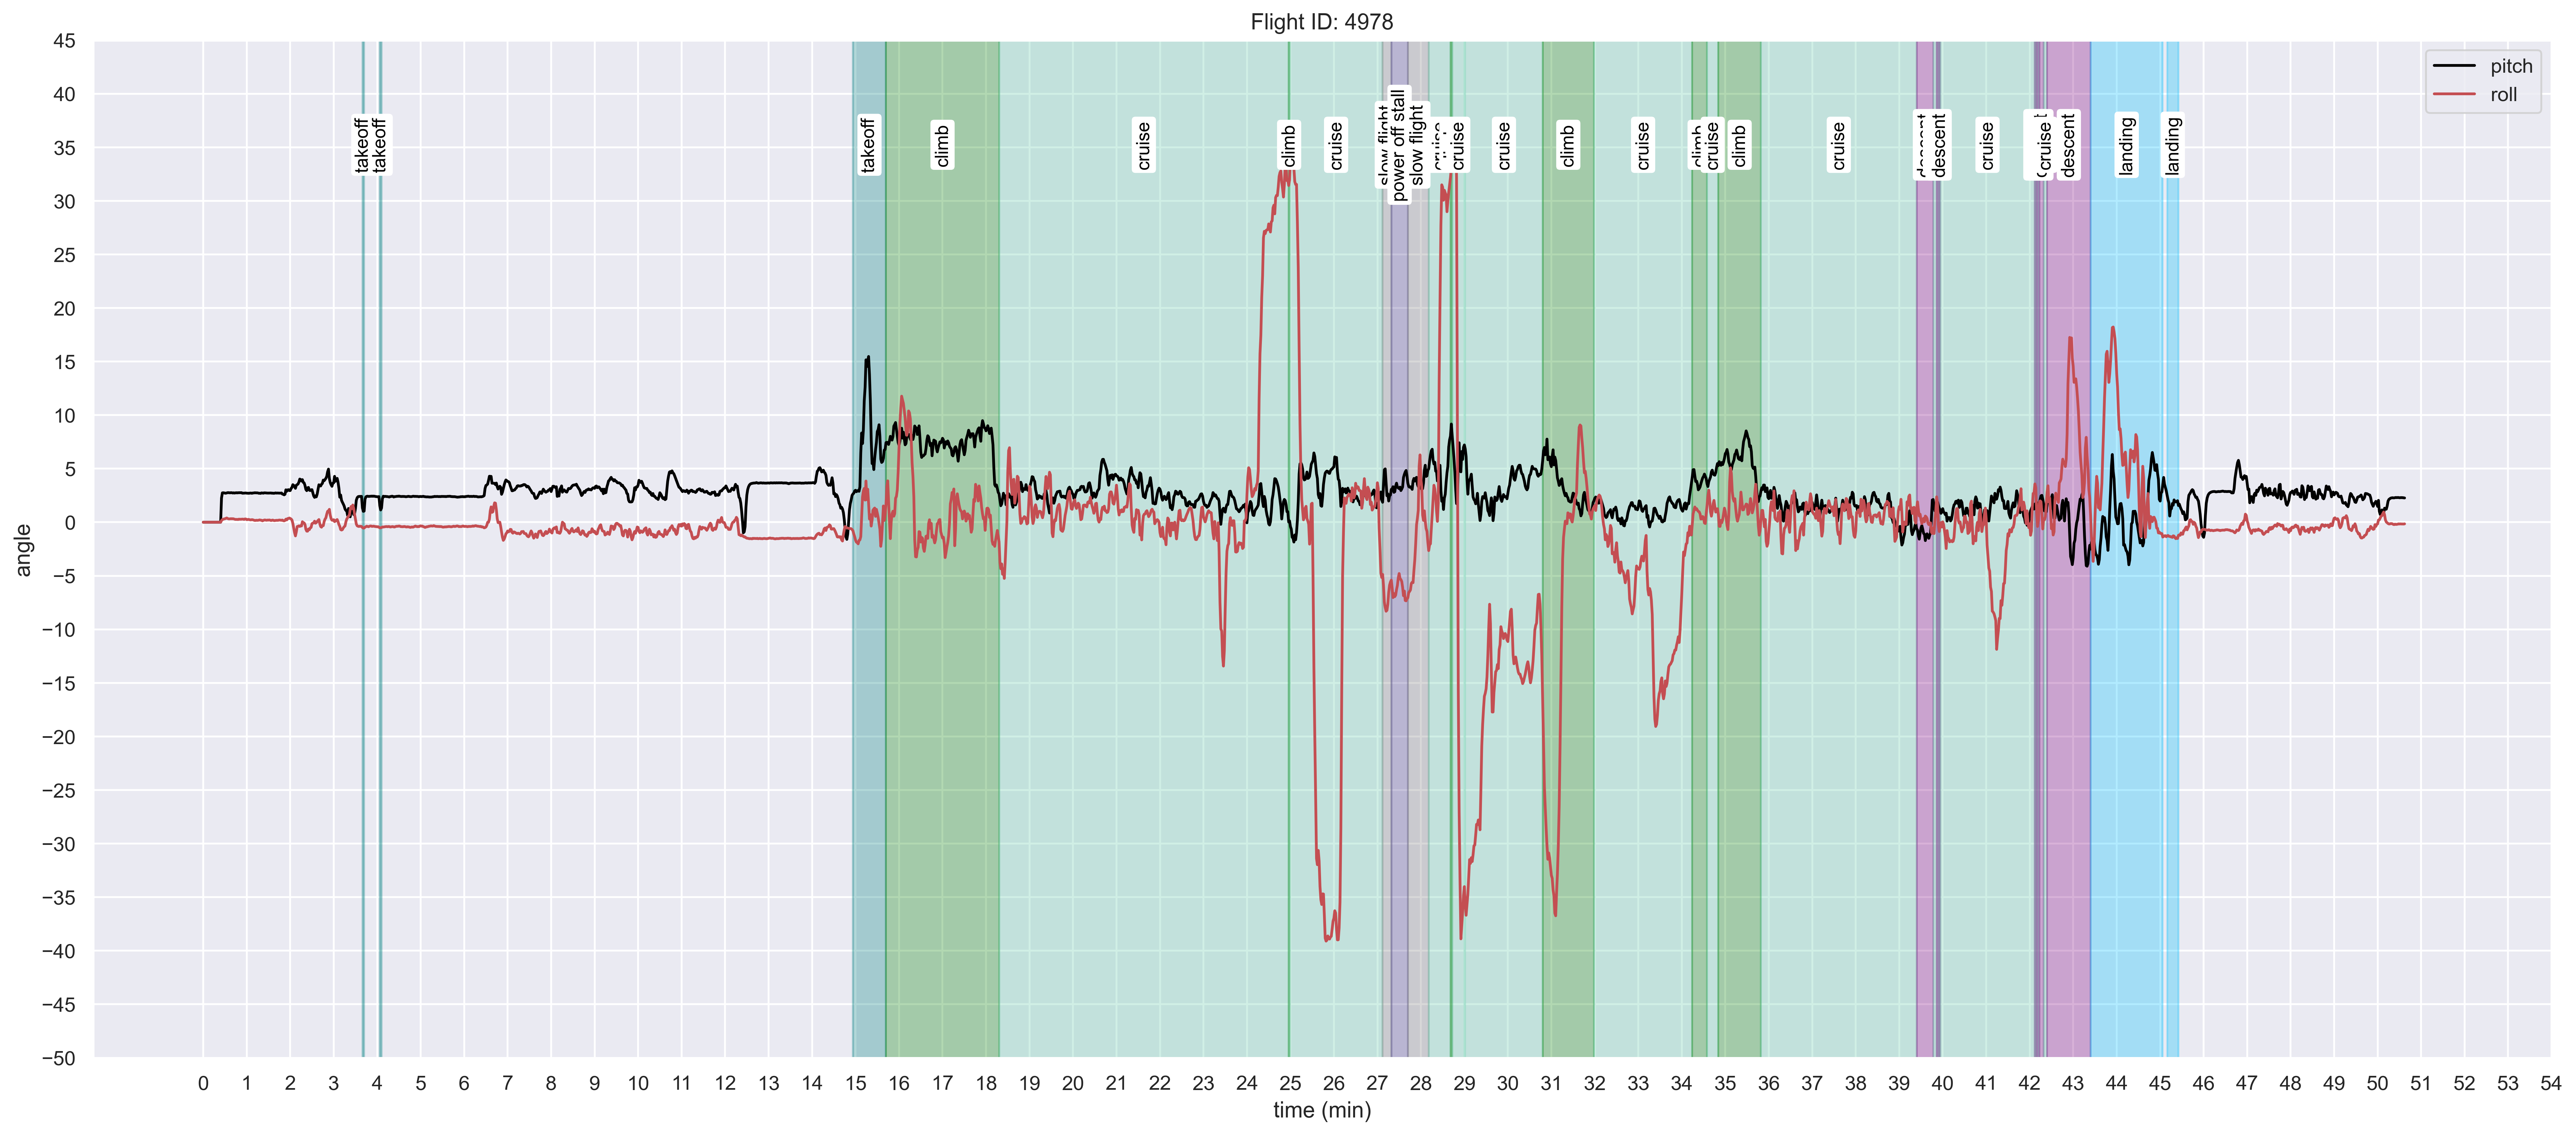

In [37]:
flight = "4978"
# shaded_ranges = [
#     (13.5, 14.5, "takeoff"), (14.5, 15.5, "climb"), (15.6, 16.9, "cruise"), (17, 18.2, "landing"),
#     (18.3, 19, "takeoff"), (19.1, 20.1, "climb"), (20, 22.1, "cruise"), (22.2, 23.6, "landing"),
#     (23.7, 24.6, "takeoff"), (24.7, 25.36, "climb"), (25.4, 27.8, "cruise"), (27.9, 29.6, "landing"),
#     (29.7, 30.7, "takeoff"), (30.8, 31.4, "climb"), (31.5, 33, "cruise"),(33, 34, "descent"), (34, 35.5, "landing"), 
#     (35.6, 36.5, "takeoff"), (36.6, 37.4, "climb"), (37.5, 38.9, "cruise"), (39, 39.8, "descent"), (39.8, 40.8, "landing"), 
#     (40.9, 42, "takeoff"),(42.1, 42.9, "climb"),(43, 45.2, "cruise"), (45.3, 46.4, "descent"), (46.5, 48, "landing"),
# ]


# Define colors for each activity
activity_colors = {
    "takeoff": 'teal',
    "landing": 'deepskyblue',
    "climb": 'green',
    "descent": 'purple',
    "cruise": 'MediumAquamarine', 
    "power off stall": 'DarkSlateBlue', 
    "power on stall": 'orange', 
    "steep turns": 'blueviolet',
}

time_minutes = df["time"].to_numpy()
bat_1_soc = df["soc"].to_numpy()
speed = df['indicated_air_speed'].to_numpy()
power = df['motor_power'].to_numpy()
alt = df['pressure_altitude'].to_numpy()
pitch = df['pitch'].to_numpy()
roll = df['roll'].to_numpy()

plt.figure(figsize=(24, 10), dpi=300)  # Adjust the width (12) as needed
plt.plot(time_minutes, bat_1_soc, c="y", label = "soc")
plt.plot(time_minutes, speed, c="b", label = "ias")
plt.plot(time_minutes, power, c="r", label = "power")
plt.xlabel("time (min)")
plt.ylabel("ias, soc, motor_power")
plt.title("Flight ID: " + flight)


for start, end, activity in shaded_ranges:
    plt.axvspan(start, end, color=activity_colors.get(activity, 'gray'), alpha=0.3)
    if activity:
        plt.text((start + end) / 2, plt.ylim()[1] - 5, activity, ha='center', va='center', fontsize=10, color='black', bbox=dict(facecolor='white', edgecolor='none', boxstyle='round,pad=0.2'), rotation='vertical')

# Add a grid in the background
plt.grid(True)
# Increase the number of ticks on both x and y axes
plt.xticks(range(0, 55, 1))  
plt.yticks(range(0, 115,5))  
plt.legend()
plt.show()

############################################################################################################################################################################################################################
plt.figure(figsize=(24, 10), dpi=300)  # Adjust the width (12) as needed
plt.plot(time_minutes, alt, c="r", label = "altitude")
plt.xlabel("time (min)")
plt.ylabel("pressure_alt")
plt.title("Flight ID: " + flight)

for start, end, activity in shaded_ranges:
    plt.axvspan(start, end, color=activity_colors.get(activity, 'gray'), alpha=0.3)
    if activity:
        plt.text((start + end) / 2, plt.ylim()[1] - 5, activity, ha='center', va='center', fontsize=10, color='black', bbox=dict(facecolor='white', edgecolor='none', boxstyle='round,pad=0.2'), rotation='vertical')

# Add a grid in the background
plt.grid(True)
# Increase the number of ticks on both x and y axes
plt.xticks(range(0, 55, 1))  
plt.yticks(range(0, 1250,50))  
plt.legend()
plt.show()

################################################################################################################################################################################################################################
plt.figure(figsize=(24, 10), dpi=400) 
plt.plot(time_minutes, pitch, c="black", label = "pitch")
plt.plot(time_minutes, roll, c="r", label = "roll")
plt.xlabel("time (min)")
plt.ylabel("angle")
plt.title("Flight ID: " + flight)

# Add shaded regions for specific time ranges and label them
for start, end, activity in shaded_ranges:
    plt.axvspan(start, end, color=activity_colors.get(activity, 'gray'), alpha=0.3)
    if activity:
        plt.text((start + end) / 2, plt.ylim()[1] -5 , activity, ha='center', va='center', fontsize=10, color='black', bbox=dict(facecolor='white', edgecolor='none', boxstyle='round,pad=0.2'), rotation='vertical')

# Add a grid in the background
plt.grid(True)
# Increase the number of ticks on both x and y axes
plt.xticks(range(0, 55, 1))  
plt.yticks(range(-50, 50,5))  
plt.legend()
plt.show()